In [ ]:
!mkdir -p ./local/datasets/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo" -O local/datasets/Dataset_JPV.zip && rm -rf /tmp/cookies.txt

--2021-05-02 15:38:48--  https://docs.google.com/uc?export=download&confirm=NPcM&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo
Resolving docs.google.com (docs.google.com)... 142.250.65.78, 2607:f8b0:4004:832::200e
Connecting to docs.google.com (docs.google.com)|142.250.65.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-58-docs.googleusercontent.com/docs/securesc/rsl2hpbj09028cvauvsnkna1b1ac7ibo/kgagaoqqtev93km8rne5psanmokuspfk/1619969925000/14059520846711589950/13624265010501874583Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download [following]
--2021-05-02 15:38:48--  https://doc-00-58-docs.googleusercontent.com/docs/securesc/rsl2hpbj09028cvauvsnkna1b1ac7ibo/kgagaoqqtev93km8rne5psanmokuspfk/1619969925000/14059520846711589950/13624265010501874583Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download
Resolving doc-00-58-docs.googleusercontent.com (doc-00-58-docs.googleusercontent.com)... 142.250.81.193, 2607:f8b0:4004:82f::2001
Connecting to doc-00-

In [ ]:
!unzip -o "./local/datasets/Dataset_JPV.zip" -d Dataset_JPV > /dev/null

mapname:  conversion of  failed


In [ ]:
import numpy as np 
import cv2

In [ ]:
 #load a image and Origin mask
I=cv2.imread('Dataset_JPV/train/x/img612.jpg')#img72#216
OrgMask=cv2.imread('Dataset_JPV/train/y/img612.png')#216
print(I.shape)

(240, 320, 3)


Gaussian filter

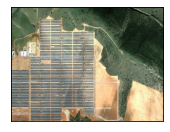

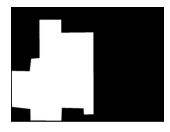

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:
from matplotlib import pyplot as plt
Irgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(Irgb)
plt.xticks([]), plt.yticks([]), plt.show()
plt.subplot(122)
plt.imshow(OrgMask)
plt.xticks([]), plt.yticks([]), plt.show()

histogram

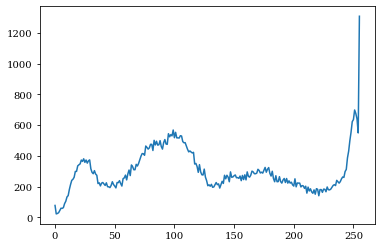

In [ ]:
hist=cv2.calcHist([Irgb],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

HSV color-space

In [ ]:
#Noise filtered
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(Irgb,-1,kernel)
#Conversión a HSV
Ihsv=cv2.cvtColor(dst,cv2.COLOR_BGR2HSV)#

#Ihsv=cv2.cvtColor(Irgb,cv2.COLOR_BGR2HSV)
#plt.show(Ihsv)

m

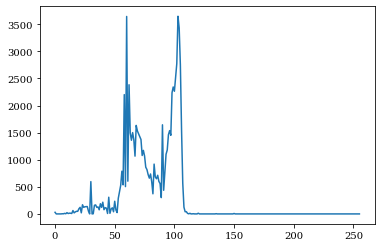

In [ ]:
hist=cv2.calcHist([Ihsv],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

(Text(0.5, 1.0, 'yellow filter'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

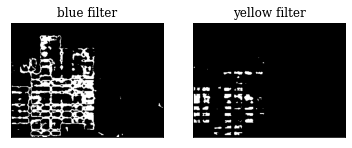

In [ ]:
lower_blue = np.array([94,0,0])#(V,S,H)
upper_blue = np.array([115,50,255])
#lower_blue = np.array([0,0,0])
#upper_blue = np.array([180,100,50])
lower_yellow = np.array([0,0,0])
upper_yellow = np.array([40,255,255])

mask1 = cv2.inRange(Ihsv, lower_blue, upper_blue);#Irgb
#res = cv2.bitwise_and(I, I, mask=mask1)
mask2 = cv2.inRange(Ihsv, lower_yellow, upper_yellow);
plt.subplot(121),plt.imshow(mask1,cmap = 'gray')
plt.title('blue filter'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mask2,cmap = 'gray')
plt.title('yellow filter'), plt.xticks([]), plt.yticks([])

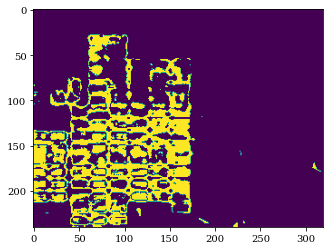

In [ ]:
bit1=cv2.bitwise_xor(mask1,mask2)
plt.imshow(bit1)

In [ ]:
k = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))

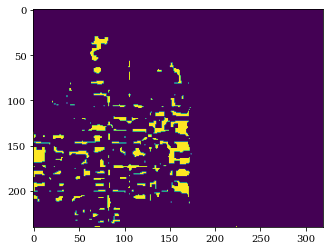

In [ ]:
#Ierosion  = cv2.erode(mask1, k, iterations=1)
Ierosion  = cv2.erode(bit1, k, iterations=1)
plt.imshow(Ierosion)

# voy aca en latex

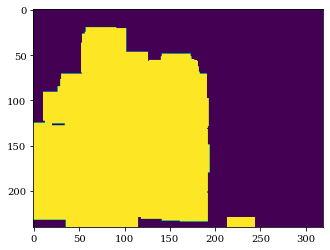

In [ ]:
Idilation = cv2.dilate(Ierosion, k, iterations=10)
plt.imshow(Idilation)


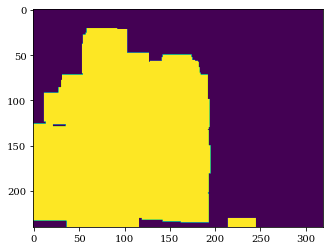

In [ ]:
#k = np.ones((2,2),np.uint8)
#Iopening  = cv2.morphologyEx(Idilation, cv2.MORPH_OPEN, k)
#plt.imshow(Iopening)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


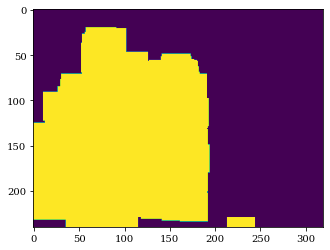

In [ ]:
cnt=cv2.findContours(Idilation,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]
mask2 = np.zeros(Idilation.shape[:2],np.uint8)
cc=cv2.drawContours(mask2, cnt, -1, 255, -1)
plt.imshow(cc)
print(mask3)

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

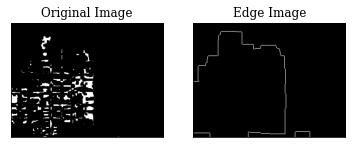

In [ ]:
edge=cv2.Canny(cc,100,105)#result1
plt.subplot(121),plt.imshow(Ierosion,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edge,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


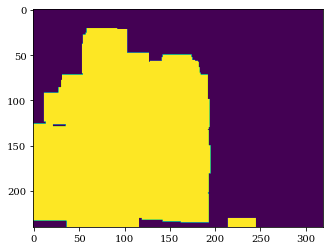

In [ ]:
plt.imshow(Iopening)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

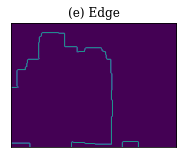

In [ ]:
plt.figure(figsize=(15,16))
plt.subplot(611)
plt.rcParams["font.family"] = "serif"
plt.subplot(111),plt.imshow(Irgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(dst),plt.title('(a) Gaussian blur Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(Ihsv),plt.title('(b) HSV filter')
plt.xticks([]), plt.yticks([])
plt.subplot(414),plt.imshow(res1),plt.title('(c) Blue filter')
plt.xticks([]), plt.yticks([])
plt.subplot(515),plt.imshow(Iopening),plt.title('(d) Openning')
plt.xticks([]), plt.yticks([])
plt.subplot(616),plt.imshow(edge),plt.title('(e) Edge')
plt.xticks([]), plt.yticks([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

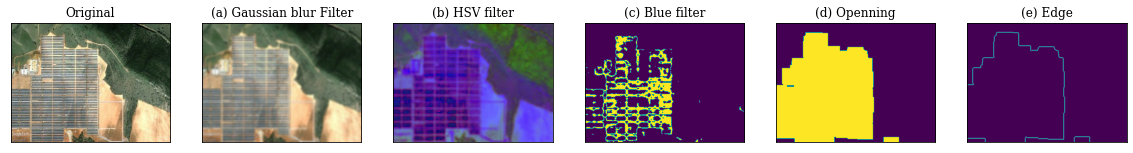

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.rcParams["font.family"] = "serif"
plt.subplot(161),plt.imshow(Irgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(162),plt.imshow(dst),plt.title('(a) Gaussian blur Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(163),plt.imshow(Ihsv),plt.title('(b) HSV filter')
plt.xticks([]), plt.yticks([])
plt.subplot(164),plt.imshow(mask1),plt.title('(c) Blue filter')
plt.xticks([]), plt.yticks([])
plt.subplot(165),plt.imshow(Iopening),plt.title('(d) Openning')
plt.xticks([]), plt.yticks([])
plt.subplot(166),plt.imshow(edge),plt.title('(e) Edge')
plt.xticks([]), plt.yticks([])

In [ ]:
# An example of second bounding box
second_bb_points = [[60, 100], [280, 100], [280, 250], [60, 250]]
stencil = numpy.zeros(img.shape).astype(img.dtype)
contours = [numpy.array(second_bb_points)]
color = [255, 255, 255]
cv2.fillPoly(stencil, contours, color)
result2 = cv2.bitwise_and(img, stencil)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

NameError: ignored

In [ ]:
# An example of second bounding box
second_bb_points =  [[60, 100], [280, 100], [280, 250], [60, 250]]
stencil = numpy.zeros(img.shape).astype(img.dtype)
stencil = numpy.zeros(img.shape).astype(img.dtype)
contours = [numpy.array(second_bb_points)]
color = [255, 255, 255]
cv2.fillPoly(stencil, contours, color)
result2 = cv2.bitwise_and(img, stencil)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

In [ ]:
# IoU calculation
intersection = numpy.logical_and(result1, result2)
union = numpy.logical_or(result1, result2)
iou_score = numpy.sum(intersection) / numpy.sum(union)
print("IoU is %s" % iou_score)